In [ ]:
import os
import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Link do pliku na Google Drive
url = 'https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D'
output_file = 'internet_service_churn.csv'
output_dir = 'data'  # Zmieniamy ścieżkę na 'internet_service_churn'

# Pobieranie pliku
print("Pobieranie pliku...")
gdown.download(url, output_file, quiet=False)

# Sprawdzanie, czy katalog istnieje
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Sprawdzanie, czy plik jest plikiem ZIP i rozpakowywanie go
if zipfile.is_zipfile(output_file):
    try:
        with zipfile.ZipFile(output_file, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        print("Plik ZIP został rozpakowany.")
    except zipfile.BadZipFile:
        print("Błąd: plik ZIP jest uszkodzony lub nie jest plikiem ZIP.")
    except Exception as e:
        print(f"Wystąpił błąd: {e}")
    finally:
        # Usuwanie pliku ZIP
        if os.path.exists(output_file):
            os.remove(output_file)
            print(f"Plik {output_file} został usunięty.")
else:
    print(f"Plik {output_file} nie jest plikiem ZIP. Przenoszę do katalogu docelowego.")
    os.rename(output_file, os.path.join(output_dir, output_file))

# Funkcja do wyświetlania tylko struktury katalogów
def list_directory_structure(path):
    for root, dirs, _ in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")

# Sprawdzanie zawartości katalogu 'internet_service_churn'
print("\nStruktura katalogu 'internet_service_churn':")
list_directory_structure(output_dir)

# Funkcja do wyszukiwania plików CSV w podfolderach
def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Znajdowanie wszystkich plików CSV w folderze docelowym
csv_files = find_csv_files(output_dir)

# Sprawdzenie, czy znaleziono jakiekolwiek pliki CSV
if not csv_files:
    raise FileNotFoundError("Nie znaleziono żadnych plików CSV po rozpakowaniu lub przeniesieniu.")

# Wczytanie danych z pierwszego znalezionego pliku CSV
csv_file = csv_files[0]
df = pd.read_csv(csv_file)

# Podgląd danych
print("\nPierwsze 5 wierszy danych:")
print(df.head())


Pobieranie pliku...


Downloading...
From: https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D
To: /content/internet_service_churn.csv
100%|██████████| 782k/782k [00:00<00:00, 47.6MB/s]


Plik ZIP został rozpakowany.
Plik internet_service_churn.csv został usunięty.

Struktura katalogu 'internet_service_churn':
data/

Pierwsze 5 wierszy danych:
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN      

> # Analiza danych

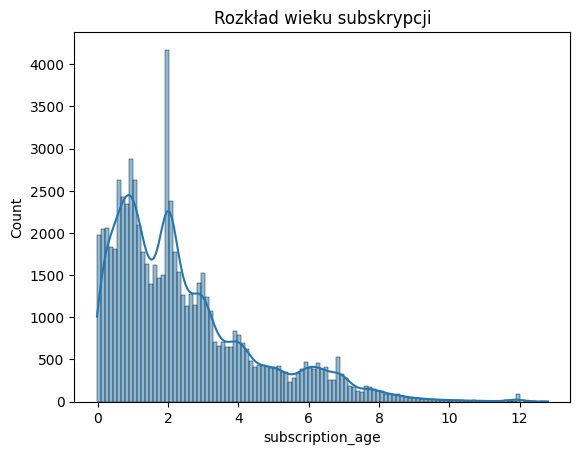

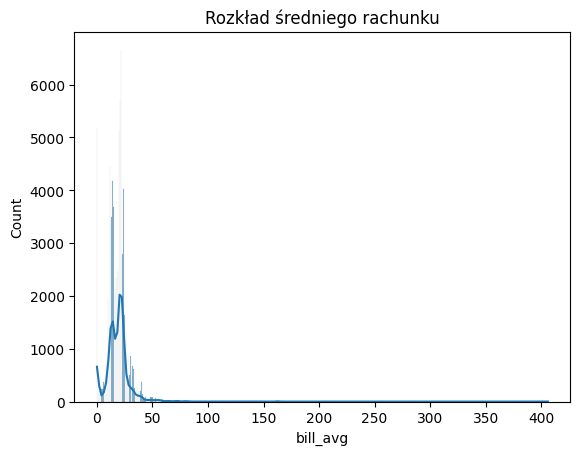

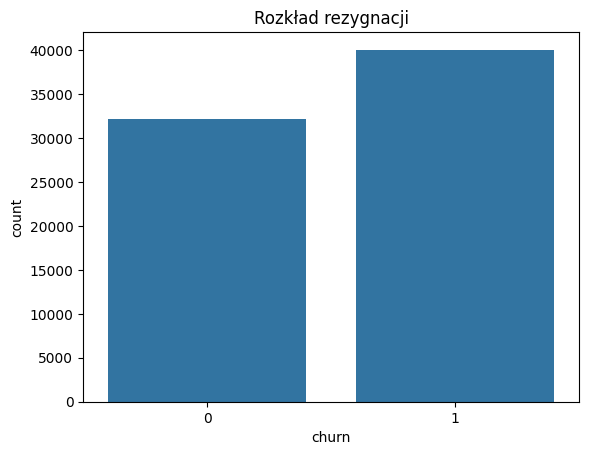

In [ ]:
# Rozkład zmiennej 'subscription_age'
sns.histplot(df['subscription_age'], kde=True)
plt.title('Rozkład wieku subskrypcji')
plt.show()

# Rozkład zmiennej 'bill_avg'
sns.histplot(df['bill_avg'], kde=True)
plt.title('Rozkład średniego rachunku')
plt.show()

# Rozkład zmiennej 'churn'
sns.countplot(x='churn', data=df)
plt.title('Rozkład rezygnacji')
plt.show()


In [ ]:
# Sprawdzenie czy są jakieś zmienne z brakującymi wartościami
missing_values = df.isna().sum()
print("Liczba pustych miejsc w każdej kolumnie:")
print(missing_values)

if any(missing_values > 0):
    print("\nCzy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Tak")
else:
    print("\nCzy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Nie")

Liczba pustych miejsc w każdej kolumnie:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Czy są jakieś zmienne z brakującymi wartościami? Odpowiedź: Tak


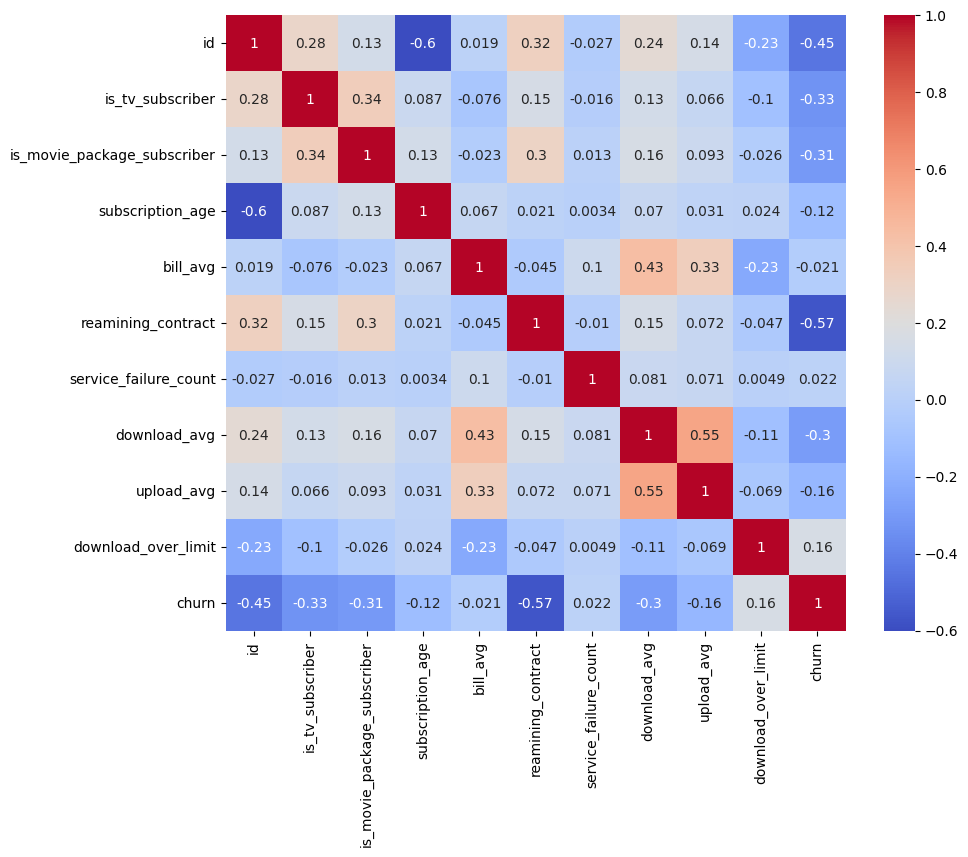

In [ ]:
# Macierz korelacji
corr = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


> # Wstępne przetwarzanie danych

In [ ]:
# Zakładam, że NaN w kolumnie reamining_contract nie oznacza braku kontraktu
# Uzupełnianie brakujących wartości kolumny 'reamining_contract' medianą
df['reamining_contract'].fillna(df['reamining_contract'].median(), inplace=True)

# Lub usunięcie kolumny, jeśli jest zbyt mało przydatna
# data.drop('reamining_contract', axis=1, inplace=True)

In [ ]:
# Zakładam, że NaN w kolumnach download_avg, i upload_avg nie oznacza braku aktywności
# Uzupełnianie brakujących wartości
df['download_avg'].fillna(df['download_avg'].median(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].median(), inplace=True)

In [ ]:
# Sprawdzenie, czy w kolumnach nadal są NaN
print(df[['reamining_contract', 'download_avg', 'upload_avg']].isna().sum())


reamining_contract    0
download_avg          0
upload_avg            0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Wybór cech do normalizacji
features_to_scale = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']

# Normalizacja cech
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
